### Image Recognition using SVM

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target 

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

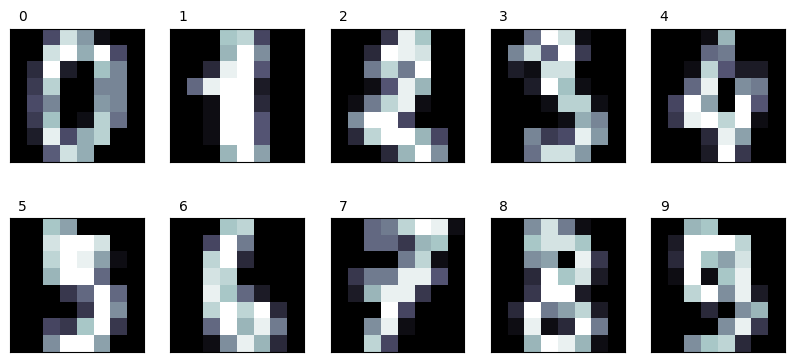

In [2]:
import matplotlib.pyplot as plt
n_row, n_col = 2,5

def print_digits(images, y, max_n = 10):
    fig = plt.figure(figsize = (2. * n_col, 2.26 * n_row))
    
    i = 0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i+1, xticks =[],yticks = [])
        p.imshow(images[i], cmap = plt.cm.bone, interpolation = "nearest")
        p.text(0, -1, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n = 10) 

In [3]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white',
             'red','lime','cyan','orange','gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])

    plt.legend(digits.target_names)
    plt.xlabel("First principle component")
    plt.ylabel("Second principle component")
    

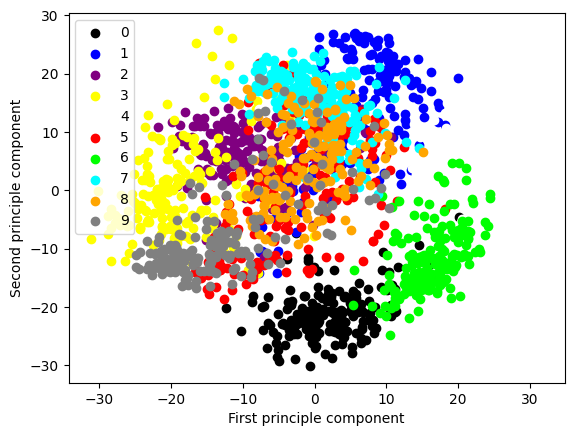

In [4]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=10)
X_pca = estimator.fit_transform(X_digits)
plot_pca_scatter()

ValueError: num must be an integer with 1 <= num <= 10, not 11

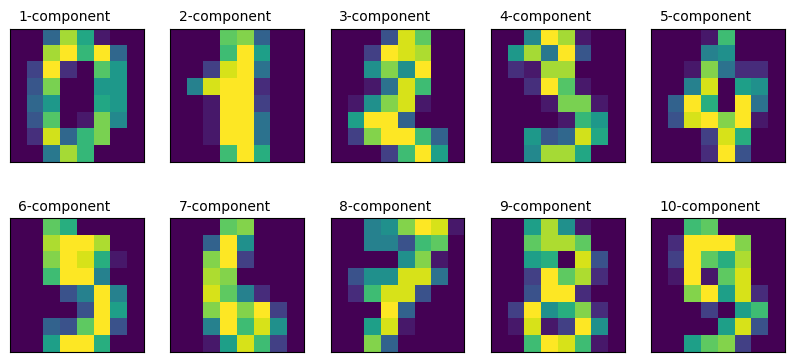

In [6]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize = (2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((8,8)), interpolation = "nearest")
        plt.text(0,-1,str(i+1)+"-component")
        plt.xticks(())
        plt.yticks(())

print_pca_components(digits.images, n_col=5, n_row=2) 


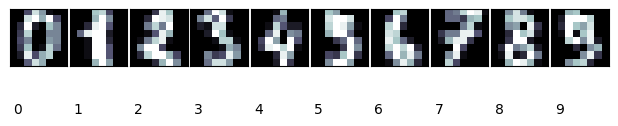

In [7]:
from sklearn.preprocessing import scale 

from sklearn.datasets import load_digits
digits = load_digits()
data = scale(digits.data)

def print_digits(images, y, max_n = 10):
    fig = plt.figure(figsize = (12, 12))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1,
                        hspace = 0.05, wspace = 0.05)
    
    i = 0
    while i < max_n and i < images.shape[0]:
        #20 x 20 images
        p = fig.add_subplot(20, 20, i+1, xticks =[],yticks = [])
        p.imshow(images[i], cmap = plt.cm.bone)
        #label
        p.text(0, 14, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n = 10) 

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    data, digits.target, digits.images, test_size = 0.25, random_state = 40)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train 



Cluster centers shape: (10, 64)
Inertia (within-cluster sum-of-squares): 877516.3761948657


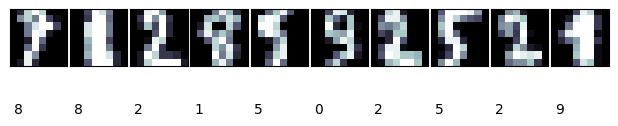

In [9]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Load digits dataset
digits = load_digits()
data = digits.data  # flattened pixel values
target = digits.target
images = digits.images  # original 8x8 image shape

# Split data
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    data, target, images, test_size=0.25, random_state=40)

# Prepare clustering
n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

# Train KMeans
clf = KMeans(init="k-means++", n_clusters=10, random_state=40)
clf.fit(X_train)

print("Cluster centers shape:", clf.cluster_centers_.shape)
print("Inertia (within-cluster sum-of-squares):", clf.inertia_)
print_digits(images_train, clf.labels_, max_n = 10)


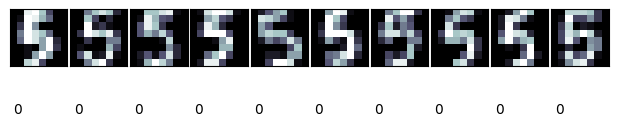

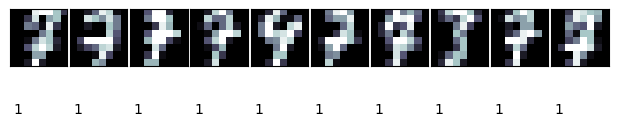

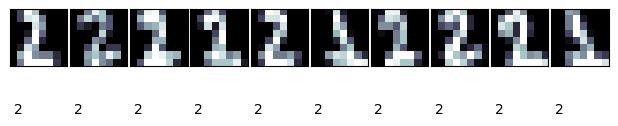

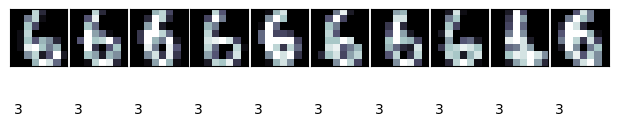

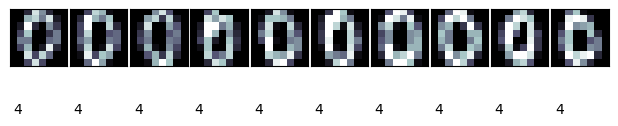

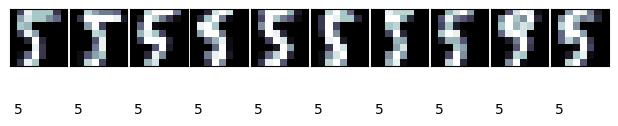

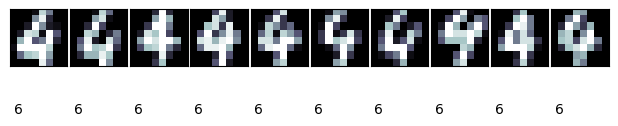

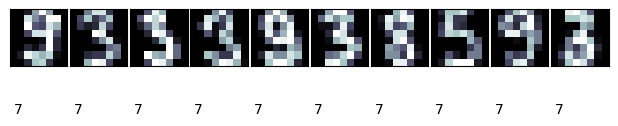

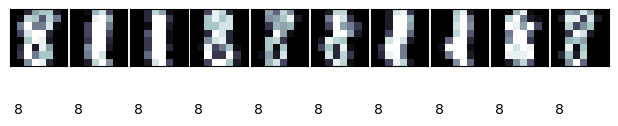

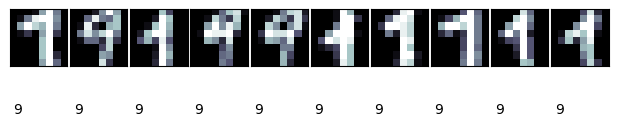

In [10]:
y_pred = clf.predict(X_test)

def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    print_digits(images, y_pred, max_n = 10)

for i in range(10):
    print_cluster(images_test, y_pred, i)

In [11]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)

h = 0.01
x_min, x_max = reduced_X_train[:,0].min() + 1, reduced_X_train[:,0].max() - 1

y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

kmeans = KMeans(init='k-means++', n_clusters=n_digits,
n_init=10)


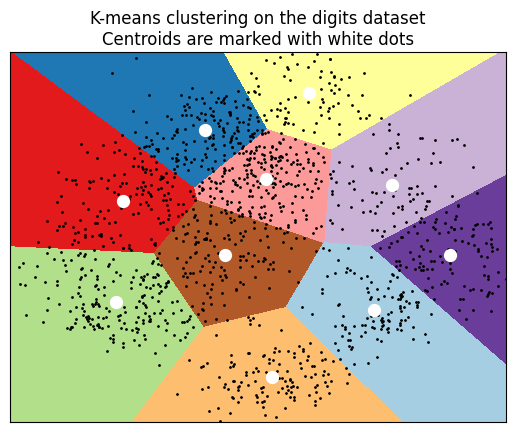

In [14]:
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
            extent=(xx.min(), xx.max(), yy.min(),
            yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.',markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0],
             centroids[:, 1],
             marker='.',
             s=169,
             linewidths=3, 
             color='w', 
             zorder=10)
plt.title("K-means clustering on the digits dataset\nCentroids are marked with white dots")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


### Affinity Propagation

In [ ]:
from sklearn import cluster
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print(aff.cluster_centers_indices_.shape)

(87,)


In [19]:
ms = cluster.MeanShift()
ms.fit(X_train)
print(ms.cluster_centers_.shape)

(1, 64)


In [21]:
from sklearn import mixture

gm = mixture.GaussianMixture(n_components=n_digits,
                           covariance_type='tied', 
                           random_state=42)
gm.fit(X_train)

,n_components,10
,covariance_type,'tied'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [27]:
from sklearn import metrics

y_pred = gm.predict(X_test)
rand_score = metrics.adjusted_rand_score(y_test, y_pred)
print(f"Adjusted rand score: {rand_score:.2f}")
print(f"Homogeneity score: {metrics.homogeneity_score(y_test, y_pred):.2f}")
print(f"Completeness score: {metrics.completeness_score(y_test, y_pred):.2f}")
print(f"V-measure score: {metrics.v_measure_score(y_test, y_pred):.2f}")


Adjusted rand score: 0.54
Homogeneity score: 0.70
Completeness score: 0.74
V-measure score: 0.72
